<a href="https://colab.research.google.com/github/Rithwik084/Bikes-Sales-Prediction/blob/main/Machine_Learning(Regression)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning(Seoul Bike Sharing Demand)**

##Data Set Processing

https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [ ]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv("SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis = 1)

In [ ]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis = 1)

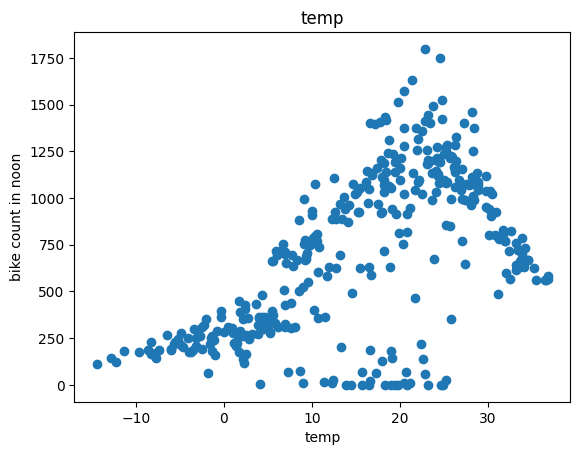

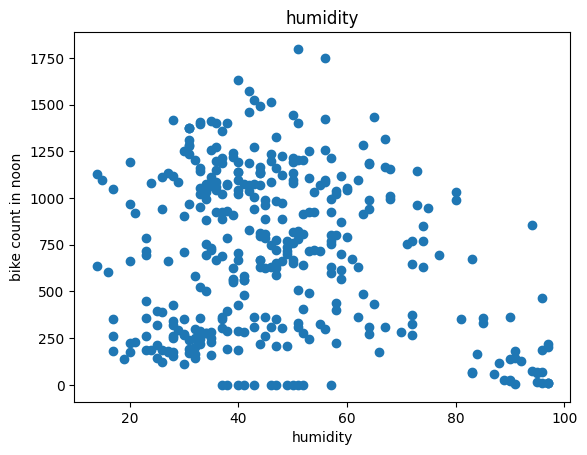

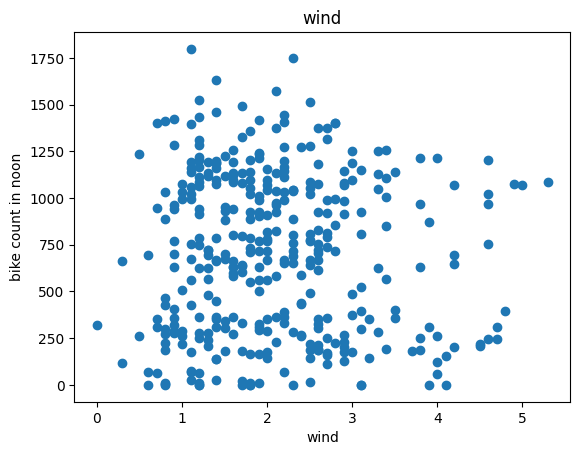

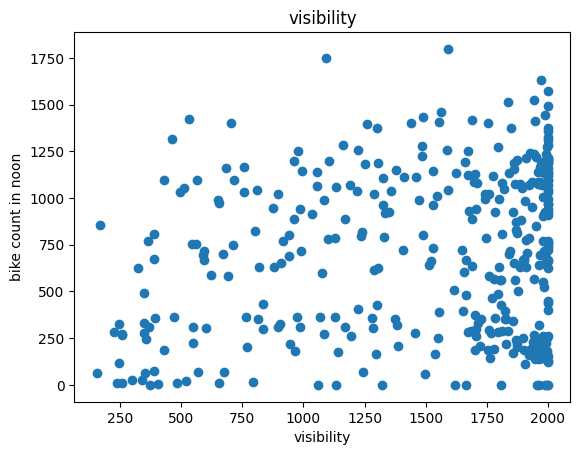

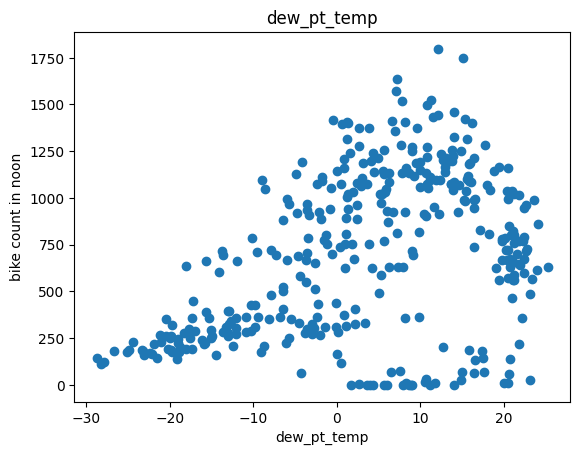

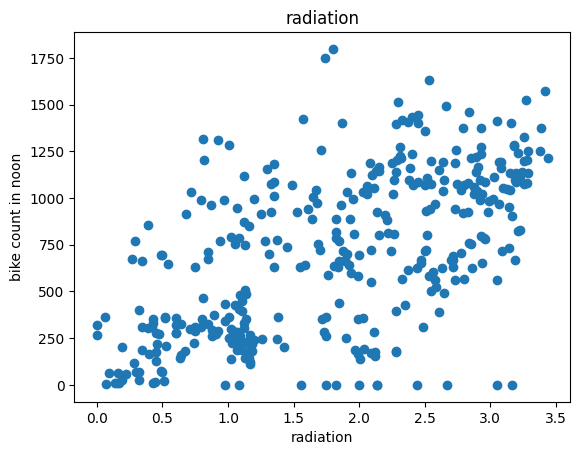

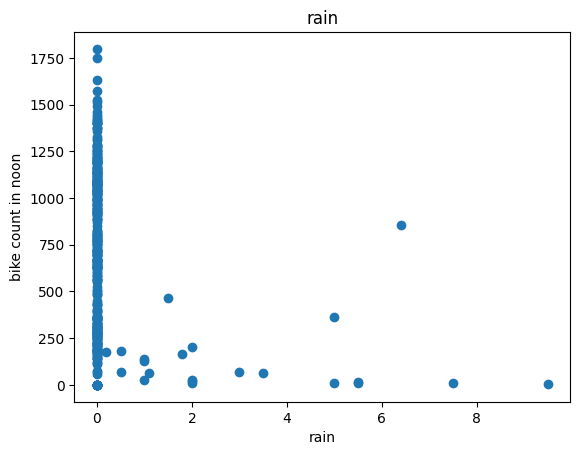

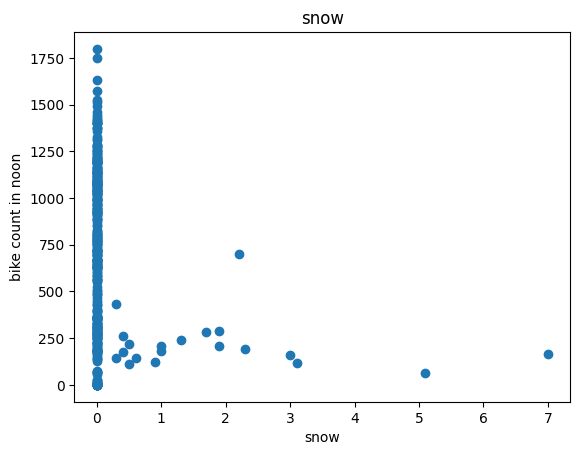

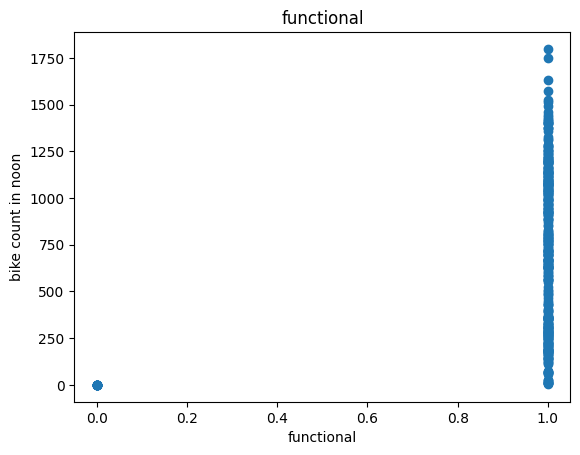

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("bike count in noon")
  plt.show()

In [ ]:
df = df.drop(["wind", "visibility", "functional"], axis = 1)

In [ ]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  y = dataframe[y_label].values.reshape(-1, 1)
  if x_labels is None:
    x = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      x = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      x = dataframe[x_labels].values
  data = np.hstack((x,y))

  return data, x, y

In [ ]:
_, x_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels = ["temp"])
_, x_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels = ["temp"])
_, x_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels = ["temp"])

In [ ]:
_, x_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, x_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, x_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

##Machine Learning Regression Models

###Linear Regression

####Single Linear Regression

In [ ]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp, y_train_temp)

LinearRegression()

In [ ]:
temp_reg.score(x_test_temp, y_test_temp)

0.3759893304379194

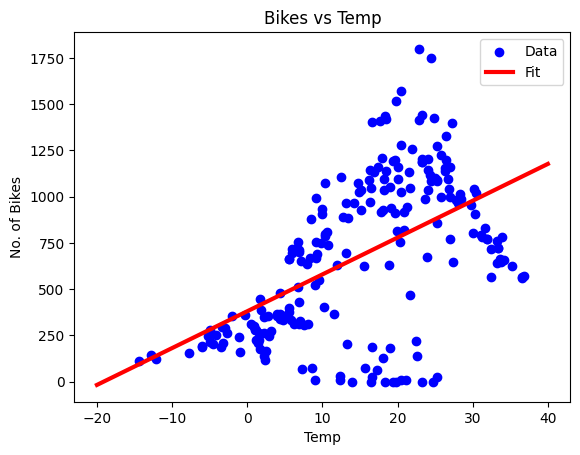

In [ ]:
plt.scatter(x_train_temp, y_train_temp, label = "Data", color = "blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label = "Fit", color = "red", linewidth = 3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel("Temp")
plt.ylabel("No. of Bikes")
plt.show()

####Multiple Linear Regression

In [ ]:
all_reg = LinearRegression()
all_reg.fit(x_train_all, y_train_all)

LinearRegression()

In [ ]:
all_reg.score(x_test_all, y_test_all)

0.37711183580599916

####Single Linear Regression with Neural Network

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis = None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

In [ ]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [ ]:
temp_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = "mean_squared_error")

In [ ]:
history = temp_nn_model.fit(x_train_temp.reshape(-1), y_train_temp, epochs = 1000, validation_data = (x_val_temp, y_val_temp), verbose = 0)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

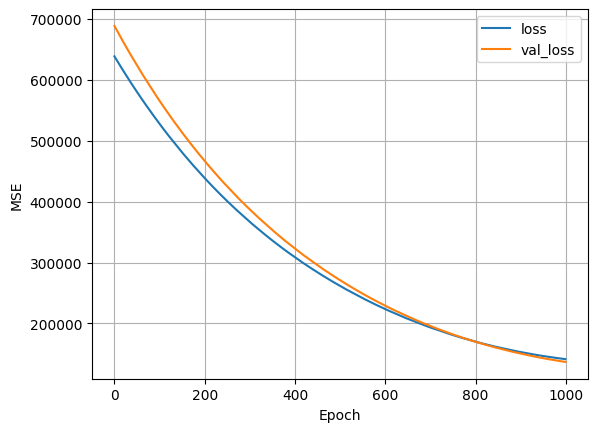

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 4ms/step


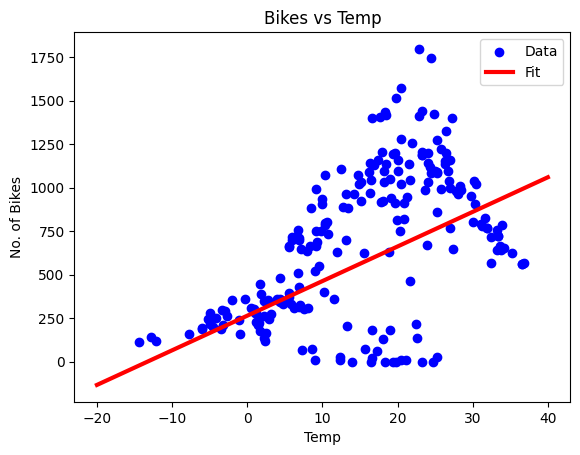

In [ ]:
plt.scatter(x_train_temp, y_train_temp, label = "Data", color = "blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label = "Fit", color = "red", linewidth = 3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel("Temp")
plt.ylabel("No. of Bikes")
plt.show()

####Multiple Linear Regression with Neural Network

In [ ]:
all_normalizer = tf.keras.layers.Normalization(input_shape = (6,), axis = None)
all_normalizer.adapt(x_train_all)

In [ ]:
all_nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(1)
])

In [ ]:
all_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = "mean_squared_error")

In [ ]:
history = all_nn_model.fit(x_train_all, y_train_all, epochs = 1000, validation_data = (x_val_all, y_val_all), verbose = 0)

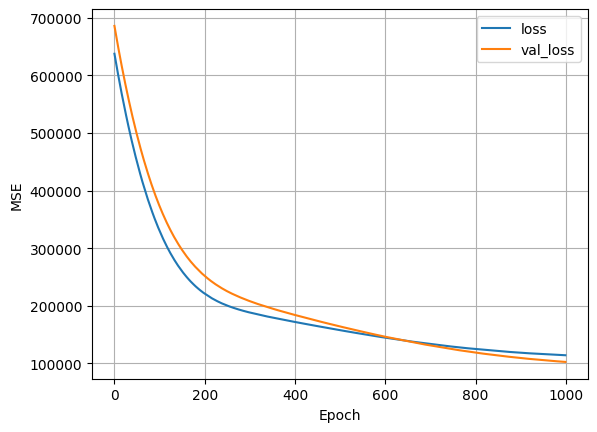

In [ ]:
plot_loss(history)

###Neural Network

####Temp NN

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape = (1,), axis = None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

In [ ]:
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = "mean_squared_error")

In [ ]:
history = nn_model.fit(x_train_temp, y_train_temp, validation_data = (x_val_temp, y_val_temp), epochs = 100, verbose = 0)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

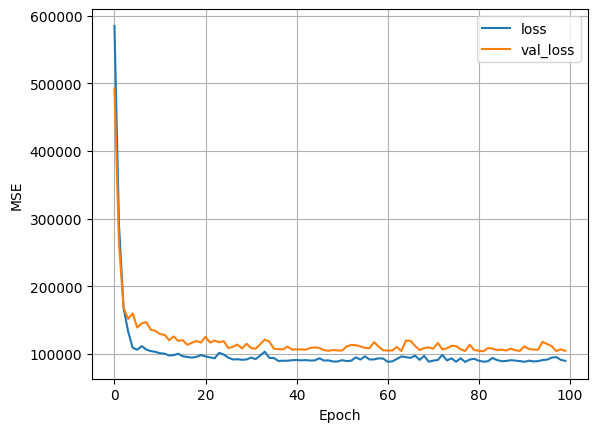

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


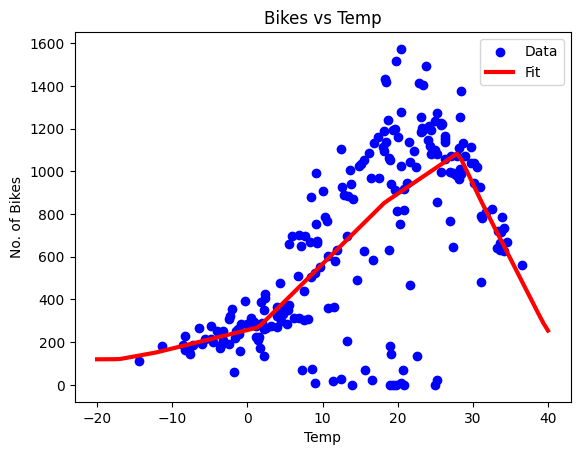

In [ ]:
plt.scatter(x_train_temp, y_train_temp, label = "Data", color = "blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label = "Fit", color = "red", linewidth = 3)
plt.legend()
plt.title("Bikes vs Temp")
plt.xlabel("Temp")
plt.ylabel("No. of Bikes")
plt.show()

####All NN

In [ ]:
all_normalizer = tf.keras.layers.Normalization(input_shape = (6,), axis = None)
all_normalizer.adapt(x_train_all)

In [ ]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = "mean_squared_error")

In [ ]:
history = nn_model.fit(x_train_all, y_train_all, validation_data = (x_val_all, y_val_all), epochs = 100, verbose = 0)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

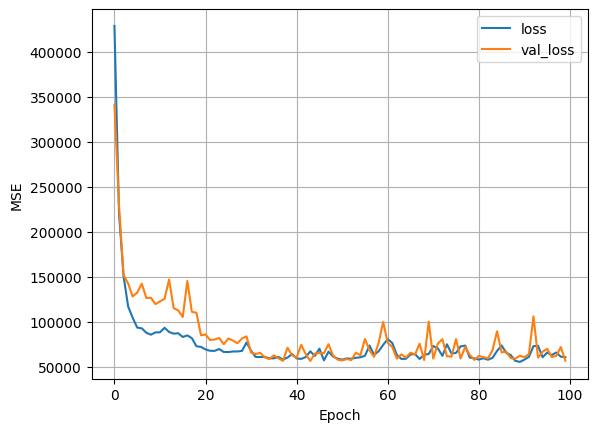

In [ ]:
plot_loss(history)

In [ ]:
#Calculate the MSE for the Multiple Linear Regression model and the All Neural Network model
y_pred_lr = all_reg.predict(x_test_all)
y_pred_nn = nn_model.predict(x_test_all)

def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

print("MSE for Multiple Linear Regression: ", MSE(y_pred_lr, y_test_all))
print("MSE for Neural Network: ", MSE(y_pred_nn, y_test_all))

3/3 [==============================] - 0s 3ms/step
MSE for Multiple Linear Regression:  131236.7517165111
MSE for Neural Network:  102216.72711959327


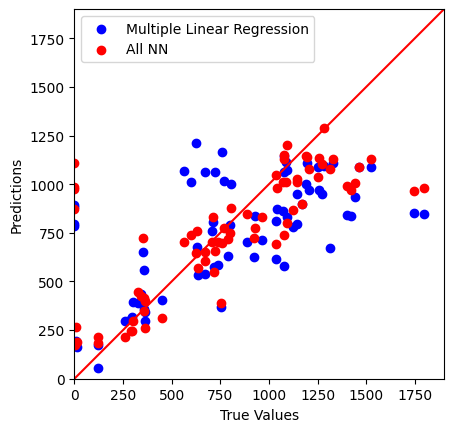

In [ ]:
ax = plt.axes(aspect='equal')
plt.scatter(y_test_all, y_pred_lr, label = "Multiple Linear Regression", color = "blue")
plt.scatter(y_test_all, y_pred_nn, label = "All NN", color = "red")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0,1900]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, c="red")
plt.legend()
plt.show()